In [32]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Numbers

In [2]:
from sklearn.datasets import fetch_openml
numbers = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
X_numbers, y_numbers = numbers["data"], numbers["target"]

In [4]:
X_numbers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X_numbers.shape

(70000, 784)

In [6]:
print(type(y_numbers[0]))

<class 'str'>


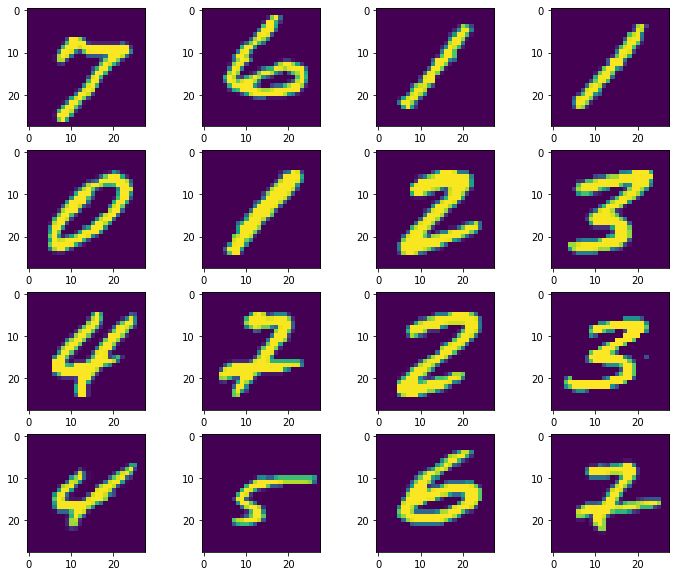

In [7]:
plt.figure(figsize = (12,10))
row, column = 4, 4

for i in range(16): 
    plt.subplot(column, row, i+1)
    some_digit = X_numbers[69000+i]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image)
plt.show()

## Letters

In [8]:
letters = pd.read_csv("a_z_handwritten_data.csv")

In [9]:
letters.rename(columns={'0':'label'}, inplace=True)

In [10]:
letters.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Change label to alphabet
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P'
                    ,16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
letters['label'] = letters['label'].map(alphabets_mapper)

In [12]:
X_letters = letters.drop('label',axis = 1)
y_letters = letters['label']

In [13]:
#convert to numpy array
X_letters = X_letters.to_numpy()
y_letters = y_letters.to_numpy()

In [14]:
X_letters

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X_letters.shape

(372450, 784)

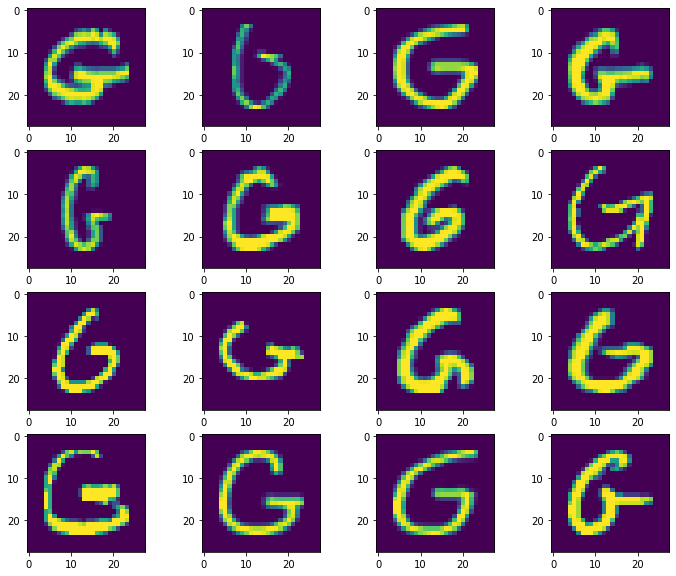

In [16]:
plt.figure(figsize = (12,10))
row, column = 4, 4

for i in range(16): 
    plt.subplot(column, row, i+1)
    some_digit = X_letters[69000+i]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image) #recreates image from pixels
plt.show()

In [17]:
print(y_letters)
print(y_numbers)

['A' 'A' 'A' ... 'Z' 'Z' 'Z']
['5' '0' '4' ... '4' '5' '6']


### Merge datasets

In [18]:
X = np.concatenate((X_letters, X_numbers), axis=0)

In [19]:
X.shape

(442450, 784)

In [20]:
y = np.concatenate((y_letters, y_numbers), axis=0)

In [21]:
y.shape

(442450,)

### Visualize data

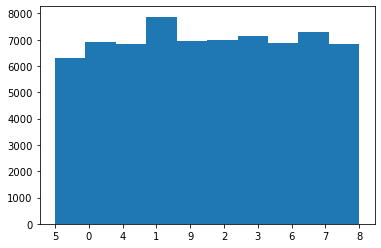

In [33]:
plt.hist(y_numbers);

The amount of records for each number is about the same

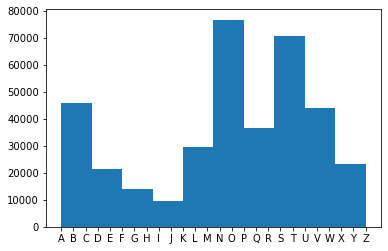

In [34]:
plt.hist(y_letters);

There is an uneven distribution for letters. Very few samples of I and J compared to O and P.

## Prepare data for ML algorithms

### Standardize the data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [23]:
y_reshape = y.reshape(-1, 1) #Encoder requires 2d array

In [24]:
#Create the label column
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

y_ord = ordinal_encoder.fit_transform(y_reshape)

y_ord[:10]

array([[10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.]])

In [35]:
y_ord.dtype # Data type is float. It needs to be integer

dtype('float64')

In [36]:
#Convert to integer

y_int = y_ord.astype(int)

y_int.dtype

dtype('int32')

## Split data (train/ test)

In [38]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X_std, y_int, test_size=0.3)

## Multiclass classification using keras

In [40]:
from tensorflow import keras

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.random.seed(42) # fix random seed for reproducibility

In [47]:
model1 = Sequential()

model1.add(Dense(50, input_dim=784, activation='relu'))
model1.add(Dense(25, activation='relu'))
model1.add(Dense(10, activation='relu'))

model1.add(Dense(36, activation='softmax')) #we have 36 categories

In [48]:
# Compile model

#Optimizer:
sgd = keras.optimizers.SGD(lr=0.05)

model1.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [49]:
# Fit the model

model1.fit(train_x, train_y, epochs=100, batch_size=100)

Epoch 1/100
3098/3098 [==============================] - 4s 1ms/step - loss: 0.7976 - accuracy: 0.7851
Epoch 2/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.3943 - accuracy: 0.8931
Epoch 3/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.3388 - accuracy: 0.9075
Epoch 4/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.2942 - accuracy: 0.9184
Epoch 5/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.2707 - accuracy: 0.9245
Epoch 6/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.2518 - accuracy: 0.9286
Epoch 7/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.2387 - accuracy: 0.9324
Epoch 8/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.2286 - accuracy: 0.9352
Epoch 9/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.2218 - accuracy: 0.9370
Epoch 10/100
3098/3098 [==============================] - 3s 1ms/step - l

3098/3098 [==============================] - 6s 2ms/step - loss: 0.1281 - accuracy: 0.9627
Epoch 80/100
3098/3098 [==============================] - 5s 2ms/step - loss: 0.1289 - accuracy: 0.9623
Epoch 81/100
3098/3098 [==============================] - 4s 1ms/step - loss: 0.1274 - accuracy: 0.9623
Epoch 82/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.1282 - accuracy: 0.9626
Epoch 83/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.1275 - accuracy: 0.9626
Epoch 84/100
3098/3098 [==============================] - 4s 1ms/step - loss: 0.1279 - accuracy: 0.9624
Epoch 85/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.1326 - accuracy: 0.9613
Epoch 86/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.1413 - accuracy: 0.9598
Epoch 87/100
3098/3098 [==============================] - 3s 1ms/step - loss: 0.1334 - accuracy: 0.9610
Epoch 88/100
3098/3098 [==============================] - 4s 1ms/step - loss:

In [52]:
# evaluate the model

scores = model1.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

4148/4148 [==============================] - 3s 764us/step - loss: 0.2989 - accuracy: 0.9285

accuracy: 92.85%
